# Визуализация данных с помощью StatsPlots

В данной части мы разберем пакет [StatsPlots](https://juliapackages.com/p/statsplots), который предоставляет множество функций для статистического анализа.

Сначала добавим необходимыt пакеты:

In [1]:
import Pkg

In [2]:
Pkg.add("StatsPlots")
Pkg.add("DataFrames")
Pkg.add("RDatasets")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [3]:
using StatsPlots

In [4]:
using DataFrames

Сначала создадим датасет своими руками и научимся изображать полученный данные. В первой колонке будет порядковый номер строки (от 1 до 10), во второй и третьей рандомные числа от 0 до 10:

In [5]:
handmade_df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))

,a,b,c
,Int64,Float64,Float64
1,1,0.422725,5.71734
2,2,9.46295,2.58654
3,3,0.330321,4.69165
4,4,9.29443,1.75896
5,5,6.71508,8.77989
6,6,6.43825,6.03035
7,7,1.07675,8.97095
8,8,9.6594,8.50698
9,9,7.12481,6.66655


Табличные структуры данных поддерживают макрос `@df`, который позволяет быстро и эффективно обращаться к колонкам. Ниже пример того, как можно удобно изобразить график, передавая в аргументы функции `plot` столбцы как обычные массивы. Первый аргумент - данные для оси Ox, второй аргумент (который включает две колонки) - на оси Оу:

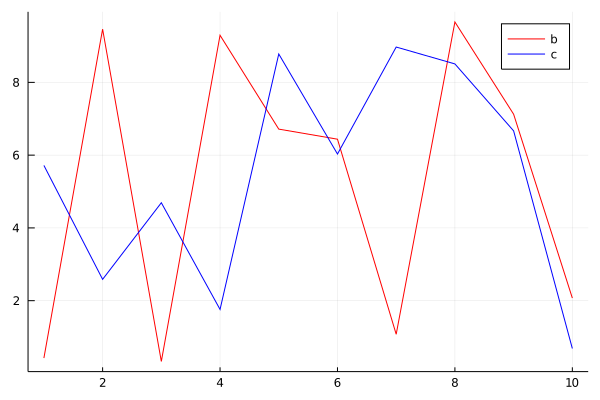

In [6]:
@df handmade_df plot(:a, [:b :c], colour = [:red :blue])

P.S. Вместо `[:b :c]` можно написать `cols(2:3)`. `cols` позволяет обращаться к диапазону столбцов (важно помнить, что индексация столбцов начинается с единицы)

Изобразим диаграмму рассеяния первого и второго столбца, а данные третьего столбца будет отражать размер кружков (параметр `markersize`):

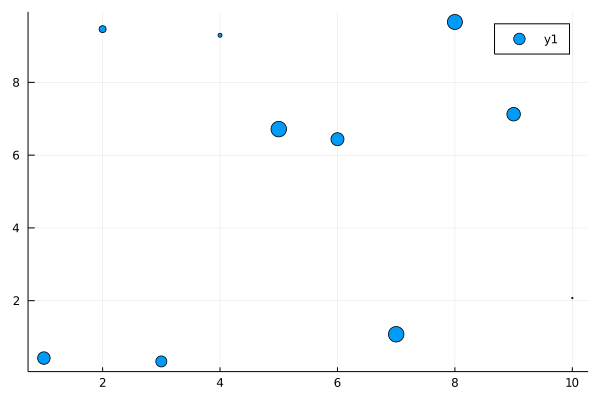

In [7]:
@df handmade_df scatter(:a, :b, markersize = 4 * log.(:c .+ 0.1))

Если есть колонка, название которой совпадает с названием одного из возможных параметров, то названия, которые не относятся к данным датафрейма, должны быть обозначены `^()`:

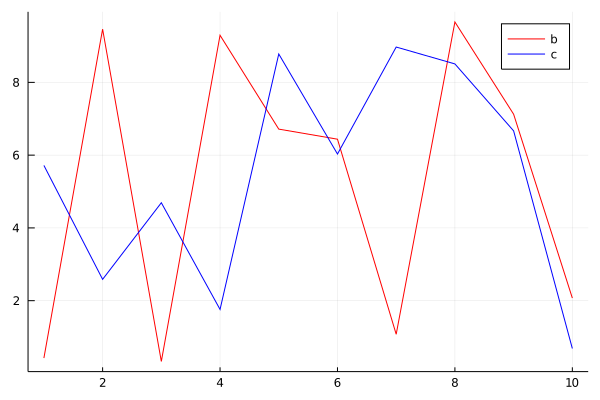

In [8]:
handmade_df[!, :red] = rand(10) # добавили колонку с названием "red"
@df handmade_df plot(:a, [:b :c], colour = ^([:red :blue]))

Теперь посмотрим, как работает `StatsPlots` с реальными датасетами. Для этого подключим пакет `RDatasets`:

In [9]:
using RDatasets

В этой части рассмотрим данные о доле расходов на еду домохозяств Испании. В датасете, который мы сохраним как `foodexp`, отраженны данные о доле расходов домохозяйств на еду (WFood), общих расходах домохозяйств (TotExp), возрасте человека, участвовавшего в опросе (Age), размере домохозяйства (Size), размере города, где проживает домохозяйство: 1 - самый маленький город, 5 - самый большой (Town) и информацию о поле опрашиваемого человека (Sex).

In [10]:
foodexp = dataset("Ecdat", "BudgetFood")

,WFood,TotExp,Age,Size,Town,Sex
,Float64,Int32,Int32,Int32,Int32,Cat…?
1,0.467699,1290941,43,5,2,man
2,0.313023,1277978,40,3,2,man
3,0.376482,845852,28,3,2,man
4,0.439691,527698,60,1,2,woman
5,0.403615,1103220,37,5,2,man
6,0.19925,1768128,35,4,2,man
7,0.15879,1107529,40,4,2,man
8,0.519465,737959,68,2,2,woman
9,0.339172,1019848,43,9,2,man


### Функция плотности по выборке 

Для начала построим выборочные функции плотности для каждого типа городов:

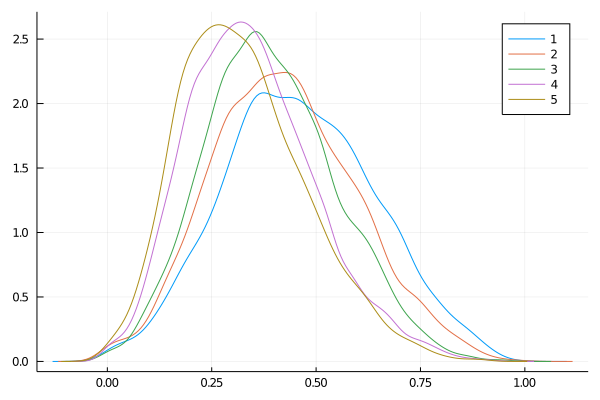

In [11]:
@df foodexp density(:WFood, group = :Town)

Также можно посмотреть на функции плотности для группы параметров (`skipmissing`, так как в колонке пол указаны не все данные):

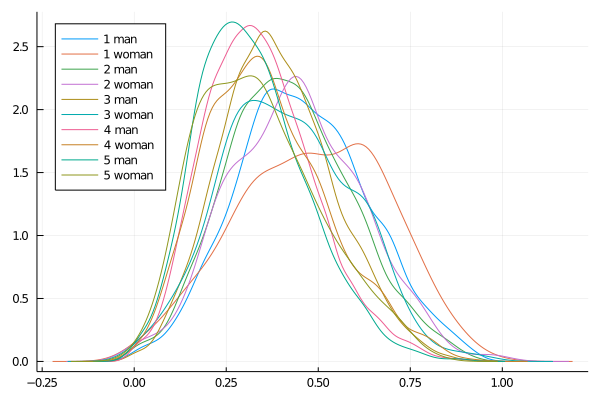

In [14]:
@df foodexp density(:WFood, group =  (:Town, skipmissing(:Sex)), legend = :topleft)

P.S. Если после `group = ` поставить не круглые скобки, а фигурные, то в легенде будет прописано название типа переменной (если не будет прописано, какое именно, то будет подставлено название колонки). Например: 

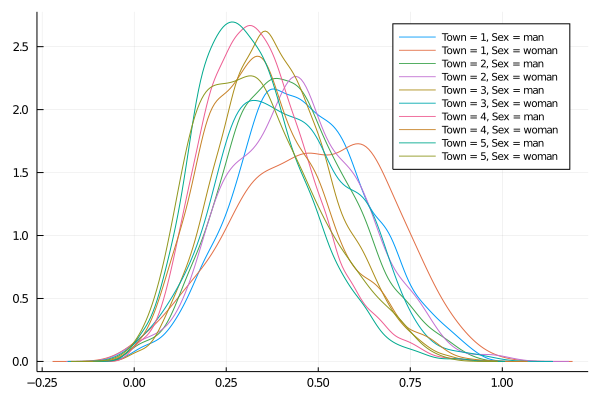

In [15]:
@df foodexp density(:WFood, group =  {:Town, Sex = skipmissing(:Sex)}, legend = :topright, legendfontsize=7)

### Гистограмма

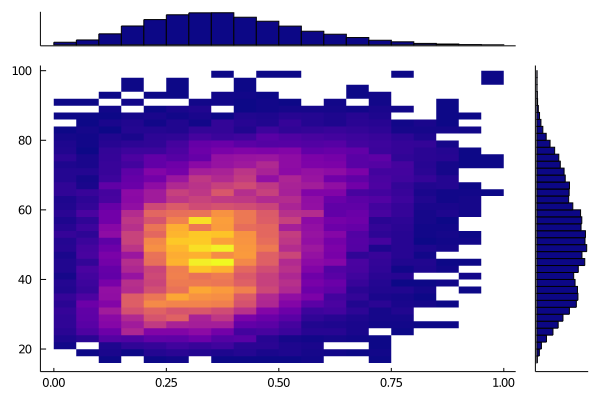

In [16]:
@df foodexp marginalhist(:WFood, :Age, fc = :plasma, bins = 40)

### Корреляционная матрица

In [17]:
gr(size = (800, 800))

Plots.GRBackend()

Для построения корреляционной матрицы возьмем другой датасет с большим количеством финансовых показателей.

In [18]:
capm = dataset("Ecdat", "Capm")

,RFood,RDur,RCon,RMRF,RF
,Float64,Float64,Float64,Float64,Float64
1,-4.59,0.87,-6.84,-6.99,0.33
2,2.62,3.46,2.78,0.99,0.29
3,-1.67,-2.28,-0.48,-1.46,0.35
4,0.86,2.41,-2.02,-1.7,0.19
5,7.34,6.33,3.69,3.08,0.27
6,4.99,-1.26,2.05,2.09,0.24
7,-1.52,-5.09,-3.79,-2.23,0.13
8,3.96,4.38,-1.08,2.85,0.17
9,-3.98,-4.23,-4.71,-6.0,0.16


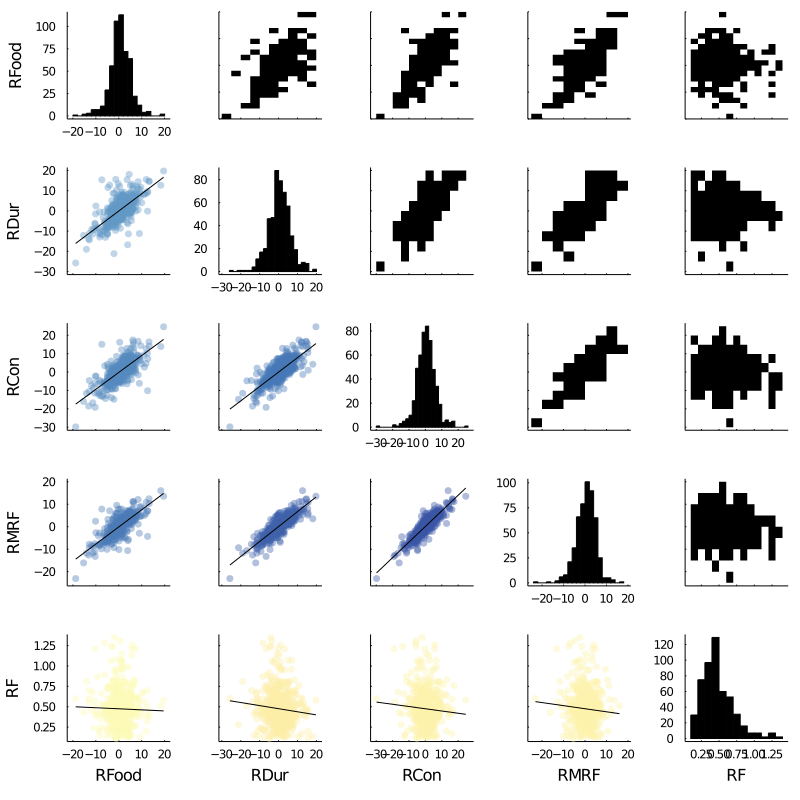

In [36]:
@df capm corrplot(cols(1:5), grid = false)

Отдельные колонки можно задать еще одним способом:

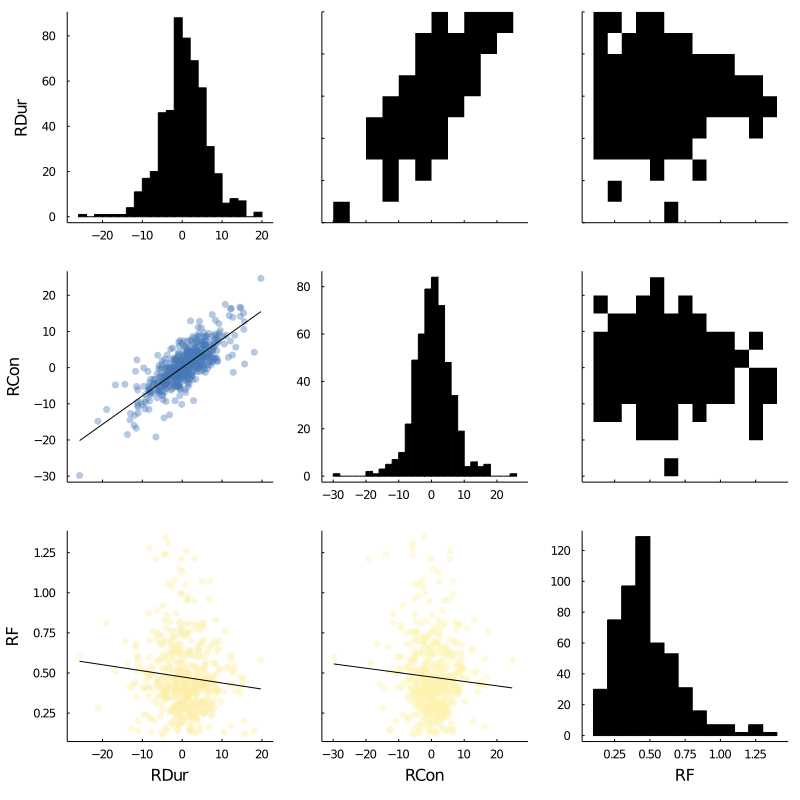

In [20]:
@df capm corrplot( [:RDur :RCon :RF], grid = false)